<a href="https://colab.research.google.com/github/conel77/pytorchwikidocs_training/blob/main/pytorchwikidocs_6%EC%9E%A5_7%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 머신 러닝 용어 이해하기

* 머신러닝 모델의 평가 - 검증용 데이터는 모델의 성능을 평가하기 위한 용도가 아니라, 모델의 성능을 조정하기 위한 용도, 하이퍼파라미터란 값에 따라 모델의 성능에 영향을 주는 매개변수 들을 의미한다.
* **매개변수**는 가중치와 편향과 같은 학습을 통해 바뀌어져가는 변수를 말한다.
* 이 둘의 큰 차이는 하이퍼파라미터는 보통 사용자가 직접 정해줄 수 있는 변수라는 점이다. 선형 회귀 챕터에서 배우게 되는 경사 하강법에서 학습률이 이에 해당된다. 반면에 매개변수는 사용자가 결정해주는 값이 아니라 모델이 학습하는 과정에서 얻어지는 값이다. 
* 훈련용 데이터로 훈련을 모두 시킨 모델은 검증용 데이터를 사용하여 정확도를 검증하며 하이어파라미터를 튜닝한다. 

* **분류와 회귀** : 선형회귀, 로지스틱 회귀가 있으며, 분류는 이진 분류와 다중 클래스 분류가 있다. 
* 지도학습과 비지도 학습이 존재한다.
* 머신러닝에서 하나의 데이터, 하나의 행을 샘플 이라고 부른다. 종속 변수 y를 예측하기 위한 각각의 독립 변수x를 특성(feature)이라고 부른다.
* 혼동행렬 : 머신러닝에서 맞춘 문제수를 전체 문제수로 나눈 값을 **정확도**라고 하는데, 정확도는 맞춘 결과와 틀린 결과에 대한 세부적인 내용을 알려주지 않는다. 이를 위해 사용하는 것이 혼동행렬(Confusion Matrix)이다. 
- 혼동행렬에서 두가지 용어가 쓰이는데, 정밀도는 양성이라고 대답한 전체 케이스에 대한 TP의 비율이고, 재현률은 실제값이 양성인 데이터의 전체 개수에 대해서 TP의 비율이다. 즉, 양성인 데이터 중에 얼마나 양성인지를 예측했는지를 나타낸다.

* 단층 퍼셉트론 - 입력층 / 출력층
* 다층 퍼셉트론 - 입력층 / 은닉층(*) / 출력층

## XOR 문제 - 단층 퍼셉트론 구현하기

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)


In [3]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)
#XOR 문제에 해당되는 입력과 출력을 정의함

In [4]:
linear = nn.Linear(2,1,bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)

In [5]:
#0과 1을 예측하는 이진 분류 문제, 비용 함수로는 크로스엔트로피 함수를 사용

criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(),lr=1)

In [6]:
for step in range(10001): 
    optimizer.zero_grad()
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0: # 100번째 에포크마다 비용 출력
        print(step, cost.item())

0 0.7273974418640137
100 0.6931476593017578
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

단층 퍼셉트론은 XOR 문제를 풀 수 없기 때문에 비용이 더이상 줄어들지 않음

In [7]:
#학습된 단층 퍼셉트론의 예측값 확인해보자
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())
    #문제 풀지 못하는 모습을 보여줌


모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


## XOR 문제 - 다층 퍼셉트론 구현하기

In [8]:
import torch
import torch.nn as nn

In [9]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [10]:
#입력층과 출력층 정의
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)


In [11]:
#다층 퍼셉트론을 설계 - 입력층, 은닉층1,2,3, 출력층을 가지는 인공 신경망 설계하기
model = nn.Sequential(
          nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Sigmoid()
          ).to(device)

In [12]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1

In [13]:
for epoch in range(10001):
    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    # 100의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 100 == 0:
        print(epoch, cost.item())

#비용이 최소화되는 방향으로 가중치와 편향이 업데이트 
#100배수 에포크 마다 비용이 줄어드는 과정을 보여줌

0 0.6948983669281006
100 0.693155825138092
200 0.6931535005569458
300 0.6931513547897339
400 0.693149209022522
500 0.6931473016738892
600 0.6931453943252563
700 0.6931434273719788
800 0.6931416988372803
900 0.6931397914886475
1000 0.6931380033493042
1100 0.6931361556053162
1200 0.6931343078613281
1300 0.6931324005126953
1400 0.6931304931640625
1500 0.6931284666061401
1600 0.6931264400482178
1700 0.6931242942810059
1800 0.6931220293045044
1900 0.6931197047233582
2000 0.6931171417236328
2100 0.6931145191192627
2200 0.6931115984916687
2300 0.6931084394454956
2400 0.6931051015853882
2500 0.6931014657020569
2600 0.6930974721908569
2700 0.6930930018424988
2800 0.6930879950523376
2900 0.6930825114250183
3000 0.6930763721466064
3100 0.6930692791938782
3200 0.6930611729621887
3300 0.6930519342422485
3400 0.6930410861968994
3500 0.6930283904075623
3600 0.6930132508277893
3700 0.6929951310157776
3800 0.6929728984832764
3900 0.6929453015327454
4000 0.6929103136062622
4100 0.6928649544715881
4200 0

In [14]:
#학습된 다층 퍼셉트론의 예측값 확인하기
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())
#실제값은 0,1,1, 0 이며 예측값은 0,1,1,0으로 문제를 해결하는 모습을 보여줌

모델의 출력값(Hypothesis):  [[1.1174576e-04]
 [9.9982870e-01]
 [9.9984229e-01]
 [1.8542419e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


## 비선형 활성화 함수(Activation function)

* 활성화 함수의 특징은 선형 함수가 아닌 비선형 함수여야한다. 선형 함수란 출력이 입력의 상수배만큼 변하는 함수를 뜻한다. 비선형 함수는 직선 1개로는 그릴 수 없는 함수를 말한다.
* 선형 함수로는 은닉층을 여러번 추가하더라도 1회 추가한 것과 차이를 줄 수 없다.
* **시그모이드 함수** : 역전파 과정에서 0에 가까운 아주 작은 기울기가 곱해지게 되면, 기울기가 잘 전달되지 않는데, 이러한 현상을 기울기 소실문제라고 한다. 
* **하이퍼볼릭탄젠트함수** : 입력값을 -1과 1 사이의 값으로 변환 , 기울기 소실 증상이 적은 편
* **렐루 함수** : 음수를 입력하면 0, 양수를 입력하면 입력값을 그대로 반환
* **리키 렐루** : 죽은 렐루를 보완하기 위해 ReLU의 변형 함수들이 등장
* **소프트맥스함수** : 다중 클래스 분류 문제에 주로 사용

## 출력층의 활성화 함수와 오차 함수의 관계

---
이진분류 | 시그모이드 | nn.BCELoss()
 
다중클래스분류 | 소프트맥스 | nn.CrossEntropyLoss()
 

회귀 | 없음 | MSE


In [15]:
#숫자 필기 데이터 소개
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드


In [16]:
print(digits.images[0])
#첫번째 샘플 출력 (.images[]를 사용하면 해당 인덱스의 이미지를 행렬로서 출력할 수 있음)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [17]:
print(digits.target[0])
#실제 레이블도 숫자 0인지 첫번째 샘플의 레이블을 확인

0


In [18]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))
#전체 샘플 수 확인

전체 샘플의 수 : 1797


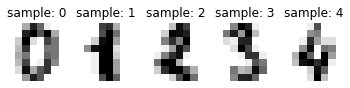

In [19]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)
#상위 5개의 샘만 시각화해보기

In [20]:
for i in range(5):
  print(i,'번 인덱스 샘플의 레이블 : ',digits.target[i])
  #샘플 상위 5개의 레이블 확인

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


In [21]:
print(digits.data[0])
#첫번째 샘플을 출력해보기 - 8*8행렬이 아니라 64차원의 벡터로 저장된 것을 볼 수 있다.


[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [22]:
X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블

## 다층 퍼셉트론 분류기 만들기

In [23]:
import torch
import torch.nn as nn
from torch import optim


In [24]:
model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer3 = 16, output_layer = 10
)


In [25]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)
#torch 텐서형으로 변환

In [26]:
loss_fn = nn.CrossEntropyLoss() 

In [27]:
optimizer = optim.Adam(model.parameters())

losses = []

In [28]:
for epoch in range(100):
  optimizer.zero_grad()
  y_pred = model(X) # forwar 연산
  loss = loss_fn(y_pred, Y)
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))

  losses.append(loss.item())


Epoch    0/100 Cost: 2.381846
Epoch   10/100 Cost: 2.086940
Epoch   20/100 Cost: 1.844468
Epoch   30/100 Cost: 1.555474
Epoch   40/100 Cost: 1.246410
Epoch   50/100 Cost: 0.968091
Epoch   60/100 Cost: 0.724376
Epoch   70/100 Cost: 0.519714
Epoch   80/100 Cost: 0.380598
Epoch   90/100 Cost: 0.293385


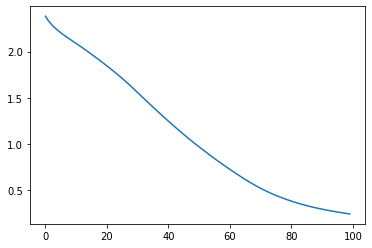

In [29]:
plt.plot(losses)
#loss 값 확인

## 다층 퍼셉트론 MNIST 로 분류하기

In [30]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

In [31]:
mnist = fetch_openml('mnist_784', version=1, cache=True)


In [32]:
mnist.target = mnist.target.astype(np.int8)
X = mnist.data / 255  # 0-255값을 [0,1] 구간으로 정규화
y = mnist.target

훈련 데이터와 테스트 데이터의 분리

In [33]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [38]:
import pandas as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train.values)
X_test = torch.Tensor(X_test.values)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)


다층 퍼셉트론

In [45]:
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [46]:
from torch import optim

# 오차함수 선택
loss_fn = nn.CrossEntropyLoss()

# 가중치를 학습하기 위한 최적화 기법 선택
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [47]:
def train(epoch):
    model.train()  # 신경망을 학습 모드로 전환

    # 데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행
    for data, targets in loader_train:

        optimizer.zero_grad()  # 경사를 0으로 초기화
        outputs = model(data)  # 데이터를 입력하고 출력을 계산
        loss = loss_fn(outputs, targets)  # 출력과 훈련 데이터 정답 간의 오차를 계산
        loss.backward()  # 오차를 역전파 계산
        optimizer.step()  # 역전파 계산한 값으로 가중치를 수정

    print("epoch{}：완료\n".format(epoch))

In [48]:
def test():
    model.eval()  # 신경망을 추론 모드로 전환
    correct = 0

    # 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
    with torch.no_grad():  # 추론 과정에는 미분이 필요없음
        for data, targets in loader_test:

            outputs = model(data)  # 데이터를 입력하고 출력을 계산

            # 추론 계산
            _, predicted = torch.max(outputs.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산
            correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 경우 정답 카운트를 증가

    # 정확도 출력
    data_num = len(loader_test.dataset)  # 데이터 총 건수
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

In [49]:
for epoch in range(3):
    train(epoch)

test()

epoch0：완료

epoch1：완료

epoch2：완료


테스트 데이터에서 예측 정확도: 9536/10000 (95%)



예측 결과 : 2
이 이미지 데이터의 정답 레이블은 2입니다


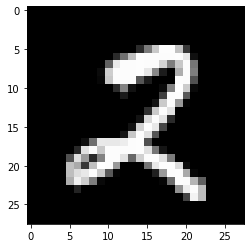

In [50]:
index = 2018

model.eval()  # 신경망을 추론 모드로 전환
data = X_test[index]
output = model(data)  # 데이터를 입력하고 출력을 계산
_, predicted = torch.max(output.data, 0)  # 확률이 가장 높은 레이블이 무엇인지 계산

print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))

## 과적합을 막는 방법들
- 데이터의 양을 늘리기
- 모델의 복잡도 줄이기
- 가중치 규제 적용하기
- 드롭아웃(신경망의 일부 사용x)


## 기울기 소실과 폭주
- 입력층에 가까운 층들에서 가중치들이 업데이트가 제대로 되지 않으면 최적 모델을 찾을 수 없게 되는데, 이를 기울기 소실이라고 한다.
- 기울기가 점차 커지더니 가중치들이 비정상적으로 큰 값이 되면서 결국 발산하기도한다.(기울기폭주)
- **가중치 초기화** : 같은 모델을 훈련시키더라도 가중치가 초기에 어떤 값을 가졌느냐에 따라서 모델의 훈련 결과가 달라지기도 한다. 가중치 초기화만 적절히 해줘도 기울기 소실 문제 완화가 가능하다.
* *세이비어 초기화, He 초기화* 가 존재
- 배치 정규화 : 내부 공변량 변화, 배치 정규화
- 층 정규화

## CNN으로 MNIST 분류하기

In [51]:
import torch
import torch.nn as nn

In [52]:
inputs = torch.Tensor(1, 1, 28, 28)
print('텐서의 크기 : {}'.format(inputs.shape))


텐서의 크기 : torch.Size([1, 1, 28, 28])


In [53]:
conv1 = nn.Conv2d(1, 32, 3, padding=1)
print(conv1)
#첫번째합성곱층

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [54]:
conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
print(conv2)
#두번째 합성곱 층 

Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [55]:
#맥스풀링구현
pool = nn.MaxPool2d(2)
print(pool)

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


In [56]:
#구현체를 연결하여 모델 만들기
out = conv1(inputs)
print(out.shape)

torch.Size([1, 32, 28, 28])


In [57]:
out = pool(out)
print(out.shape)

torch.Size([1, 32, 14, 14])


In [58]:
out = conv2(out)
print(out.shape)

torch.Size([1, 64, 14, 14])


In [59]:
out = pool(out)
print(out.shape)

torch.Size([1, 64, 7, 7])


In [60]:
#텐서 펼치는 작업 진행
out = out.view(out.size(0), -1) 
print(out.shape)

torch.Size([1, 3136])


In [61]:
fc = nn.Linear(3136, 10) # input_dim = 3,136, output_dim = 10
out = fc(out)
print(out.shape)
#10개 뉴런을 배치하여 10개 차원의 텐서로 변환

torch.Size([1, 10])


CNN으로 MNIST 분류하기

In [62]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init


In [63]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [64]:
#학습 파라미터 설정
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [65]:
mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [66]:
#데이터 로더를 사용해 배치 크기를 지정
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [67]:
#클래스로 모델 설계
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        # 첫번째층
        # ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 두번째층
        # ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 전결합층 7x7x64 inputs -> 10 outputs
        self.fc = torch.nn.Linear(7 * 7 * 64, 10, bias=True)

        # 전결합층 한정으로 가중치 초기화
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)   # 전결합층을 위해서 Flatten
        out = self.fc(out)
        return out

In [68]:
#CNN 모델 정의
model = CNN().to(device)

In [69]:
#비용함수와 옵티마이저 정의
criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [70]:
total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))
#총 배치의 수 출력

총 배치의 수 : 600


In [71]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

[Epoch:    1] cost = 0.225659072
[Epoch:    2] cost = 0.0630080625
[Epoch:    3] cost = 0.0463266
[Epoch:    4] cost = 0.0373877175
[Epoch:    5] cost = 0.0313190743
[Epoch:    6] cost = 0.0262054093
[Epoch:    7] cost = 0.0218811594
[Epoch:    8] cost = 0.0184085406
[Epoch:    9] cost = 0.0164098572
[Epoch:   10] cost = 0.0130243106
[Epoch:   11] cost = 0.0100004096
[Epoch:   12] cost = 0.00999606866
[Epoch:   13] cost = 0.00856383145
[Epoch:   14] cost = 0.00618503802
[Epoch:   15] cost = 0.00771059701


In [72]:
#테스트 진행
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9850999712944031
